# 5A - Versión corregida
**Nota:** Esta versión ha sido corregida respecto a la entrega original. Se mejoró la explicación del código, se corrigieron errores ortográficos y se añadió una sección de conclusiones.

# Análisis Experimental de Algoritmos de Intersección de Conjuntos
**Nombre:** Brigitte Darinka Godinez Montoya  
**Materia:** Análisis de Algoritmos  
**Unidad:** Práctica de intersección (ME, BY, BK)  
**Fecha:** 24-05-2025


**Introducción**

En esta actividad analizamos los distintos algoritmos para la intersección de conjuntos ordenados con el objetivo de comparar el desempeño de los algoritmos Melding (ME), Baeza-Yates (BY) y Barbay-Kenyon (BK), así como dos versiones modificadas del algoritmo BY: búsqueda acotada (BI) y búsqueda sin acotar (B2). Se evaluará su rendimiento en términos de tiempo de ejecución, número de comparaciones realizadas y longitud del resultado.

Los conjuntos utilizados provienen de un archivo `.json`, y corresponden a tres colecciones distintas: A, B y C.


Carga y descripción de los datos

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Conjuntos de listas de posteo para intersección-20250522 (1).zip to Conjuntos de listas de posteo para intersección-20250522 (1).zip


In [5]:
import zipfile

with zipfile.ZipFile("Conjuntos de listas de posteo para intersección-20250522 (1).zip", 'r') as zip_ref:
    zip_ref.extractall("datos_interseccion")

In [6]:
import os

os.listdir("datos_interseccion")

['postinglists-for-intersection-C-k=4.json.gz',
 'postinglists-for-intersection-A-k=2.json.gz',
 'postinglists-for-intersection-B-k=3.json.gz']

In [8]:
import gzip
import json


with gzip.open('datos_interseccion/postinglists-for-intersection-A-k=2.json.gz', 'rt') as file:
    A = json.load(file)


with gzip.open('datos_interseccion/postinglists-for-intersection-B-k=3.json.gz', 'rt') as file:
    B = json.load(file)


with gzip.open('datos_interseccion/postinglists-for-intersection-C-k=4.json.gz', 'rt') as file:
    C = json.load(file)


print(f"Longitud de A: {len(A)}")
print(f"Longitud de B: {len(B)}")
print(f"Longitud de C: {len(C)}")

Longitud de A: 200
Longitud de B: 200
Longitud de C: 200


In [53]:

print("Ejemplo de A[0]:")
for i, lista in enumerate(A[0]):
    print(f"Lista {i + 1}:", lista[:10])


print("\nEjemplo de B[0]:")
for i, lista in enumerate(B[0]):
    print(f"Lista {i + 1}:", lista[:10])


print("\nEjemplo de C[0]:")
for i, lista in enumerate(C[0]):
    print(f"Lista {i + 1}:", lista[:10])

Ejemplo de A[0]:
Lista 1: [848, 1153, 2233, 3004, 3275, 3336, 3418, 3578, 4332, 4339]
Lista 2: [5, 8, 12, 14, 20, 22, 24, 28, 29, 32]

Ejemplo de B[0]:
Lista 1: [68, 260, 262, 267, 269, 272, 273, 281, 282, 289]
Lista 2: [424, 529, 535, 744, 1224, 1304, 1707, 1772, 1804, 2080]
Lista 3: [2, 3, 7, 9, 11, 12, 15, 16, 18, 19]

Ejemplo de C[0]:
Lista 1: [3, 4, 10, 17, 30, 38, 43, 49, 63, 66]
Lista 2: [243, 1553, 1848, 1887, 1949, 2177, 2402, 2466, 2564, 3005]
Lista 3: [1848, 3482, 3482, 3626, 4490, 4999, 7169, 7641, 7903, 8256]
Lista 4: [4, 49, 91, 210, 237, 242, 318, 327, 353, 358]


 Algoritmo Melding (ME)


El algoritmo Melding (ME) calcula la intersección ordenada de varias listas también ordenadas. En esta implementación, se parte de la primera lista como base y se van intersectando una a una las demás utilizando conjuntos (`set`), ya que permiten realizar intersecciones de forma eficiente.

Este enfoque nos sirve cuando se requiere obtener elementos comunes entre varias listas, especialmente cuando están ordenadas y su tamaño puede variar.


In [10]:
def interseccion_melding(listas):
    """
    Calcula la intersección de una lista de listas ordenadas.
    Parámetro:
        listas: lista de listas ordenadas
    Retorna:
        Lista con los elementos comunes en orden ascendente
    """
    if not listas:
        return []


    resultado = set(listas[0])

    for lst in listas[1:]:
        resultado = resultado.intersection(lst)

    return sorted(resultado)

a continuación presentaremos un ejemplo con el primer elemento del conjunto A, que contiene dos listas ordenadas. Se aplica el algoritmo Melding para calcular la intersección entre ellas.


In [54]:
ejemplo_A = A[0]  #

print("Listas en A[0] (primeros 10 elementos de cada una):")
for i, lista in enumerate(ejemplo_A):
    print(f"Lista {i+1}:", lista[:10])

resultado_ME = interseccion_melding(ejemplo_A)
print("\nResultado Melding:", resultado_ME[:10])
print("Longitud de la intersección:", len(resultado_ME))

Listas en A[0] (primeros 10 elementos de cada una):
Lista 1: [848, 1153, 2233, 3004, 3275, 3336, 3418, 3578, 4332, 4339]
Lista 2: [5, 8, 12, 14, 20, 22, 24, 28, 29, 32]

Resultado Melding: [6323, 12498]
Longitud de la intersección: 2


Aplicación del algoritmo Melding al conjunto A


En este paso aplicaremos el algoritmo Melding a cada elemento del conjunto A. Cada elemento de A contiene dos listas ordenadas, y se calcula la intersección entre ellas. También se mide el tiempo de ejecución para cada operación y la longitud de la lista resultante, con el fin de analizar el rendimiento del algoritmo.


In [12]:
import time


tiempos_ME_A = []
longitudes_ME_A = []


for par in A:
    inicio = time.time()
    resultado = interseccion_melding(par)
    fin = time.time()

    tiempos_ME_A.append(fin - inicio)
    longitudes_ME_A.append(len(resultado))


print("Primeras 5 longitudes:", longitudes_ME_A[:5])
print("Primeros 5 tiempos (s):", tiempos_ME_A[:5])

Primeras 5 longitudes: [2, 6, 1, 16, 5]
Primeros 5 tiempos (s): [0.0005025863647460938, 7.414817810058594e-05, 0.00013828277587890625, 0.00020599365234375, 7.772445678710938e-05]


Las listas `tiempos_ME_A` y `longitudes_ME_A` contienen los resultados del algoritmo Melding aplicado a cada elemento del conjunto A.

Estos valores los utilizaremos para generar gráficos boxplot comparativos entre algoritmos y conjuntos (A, B, C).


Aplicación del algoritmo Melding al conjunto B


Cada elemento del conjunto B contiene tres listas ordenadas. En esta sección se aplica el algoritmo Melding para calcular la intersección entre estas tres listas.

Se miden el tiempo de ejecución y la longitud de la intersección para cada elemento del conjunto.


In [13]:

tiempos_ME_B = []
longitudes_ME_B = []


for tripleta in B:
    inicio = time.time()
    resultado = interseccion_melding(tripleta)
    fin = time.time()

    tiempos_ME_B.append(fin - inicio)
    longitudes_ME_B.append(len(resultado))

# Vista previa
print("Primeras 5 longitudes B:", longitudes_ME_B[:5])
print("Primeros 5 tiempos B (s):", tiempos_ME_B[:5])

Primeras 5 longitudes B: [6, 7, 16, 4, 1]
Primeros 5 tiempos B (s): [0.00013017654418945312, 0.001703500747680664, 0.0009324550628662109, 0.0004892349243164062, 0.00012421607971191406]


Aplicación del algoritmo Melding al conjunto C


El conjunto C contiene cuádruples de listas ordenadas. Se aplica el algoritmo Melding a cada uno de estos conjuntos para obtener la intersección común.

También se mide el tiempo de ejecución y la longitud del resultado.

In [14]:

tiempos_ME_C = []
longitudes_ME_C = []


for cuarteto in C:
    inicio = time.time()
    resultado = interseccion_melding(cuarteto)
    fin = time.time()

    tiempos_ME_C.append(fin - inicio)
    longitudes_ME_C.append(len(resultado))

# vista previa
print("Primeras 5 longitudes C:", longitudes_ME_C[:5])
print("Primeros 5 tiempos C (s):", tiempos_ME_C[:5])

Primeras 5 longitudes C: [0, 2, 46, 3, 4]
Primeros 5 tiempos C (s): [0.0002799034118652344, 0.0003170967102050781, 0.0011317729949951172, 0.00022125244140625, 0.0001461505889892578]


Gráficos comparativos del algoritmo Melding (ME)


En esta sección se presentan los gráficos tipo boxplot que comparan el rendimiento del algoritmo Melding en los conjuntos A, B y C. Se visualizan dos aspectos:

- El tiempo de ejecución de la intersección.
- La longitud de la lista resultante de cada intersección.

Laa gráficas nos permiten observar la variabilidad y eficiencia del algoritmo según el número de listas involucradas.

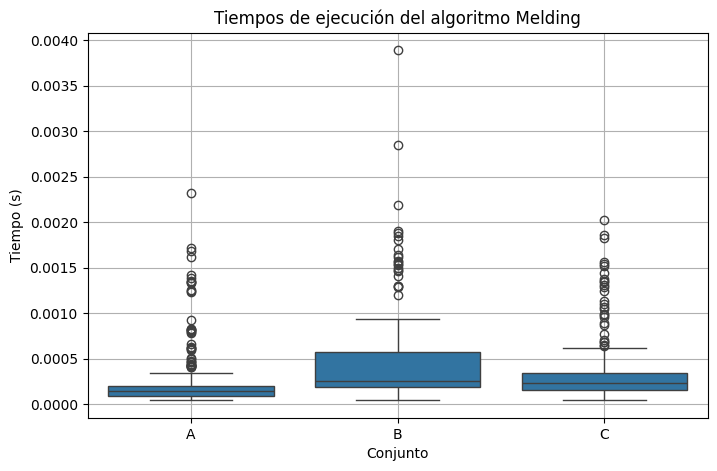

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_tiempos = pd.DataFrame({
    'A': tiempos_ME_A,
    'B': tiempos_ME_B,
    'C': tiempos_ME_C
})


df_tiempos_melted = df_tiempos.melt(var_name='Conjunto', value_name='Tiempo (s)')


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tiempos_melted, x='Conjunto', y='Tiempo (s)')
plt.title('Tiempos de ejecución del algoritmo Melding')
plt.grid(True)
plt.show()

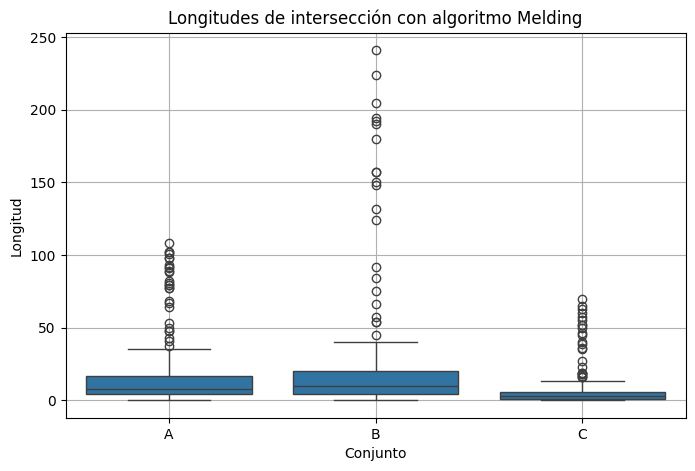

In [16]:

df_longitudes = pd.DataFrame({
    'A': longitudes_ME_A,
    'B': longitudes_ME_B,
    'C': longitudes_ME_C
})


df_longitudes_melted = df_longitudes.melt(var_name='Conjunto', value_name='Longitud')


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_longitudes_melted, x='Conjunto', y='Longitud')
plt.title('Longitudes de intersección con algoritmo Melding')
plt.grid(True)
plt.show()

Algoritmo Baeza-Yates (BY)


El algoritmo Baeza-Yates (BY) está diseñado para encontrar la intersección entre múltiples listas ordenadas de forma más eficiente que métodos ingenuos. Su estrategia se basa en:

1. Tomar la lista más corta como referencia.
2. Buscar cada uno de sus elementos en las demás listas utilizando búsqueda binaria.


In [17]:
def busqueda_binaria(lista, objetivo):
    """Devuelve True si el objetivo está en la lista usando búsqueda binaria."""
    izq, der = 0, len(lista) - 1
    while izq <= der:
        medio = (izq + der) // 2
        if lista[medio] == objetivo:
            return True
        elif lista[medio] < objetivo:
            izq = medio + 1
        else:
            der = medio - 1
    return False

def interseccion_baeza_yates(listas):
    """
    Intersección de múltiples listas ordenadas usando Baeza-Yates:
    - Selecciona la más corta.
    - Busca sus elementos en las demás usando búsqueda binaria.
    """
    if not listas:
        return []


    listas_ordenadas = sorted(listas, key=len)
    base = listas_ordenadas[0]
    otras = listas_ordenadas[1:]

    resultado = []
    for elemento in base:
        encontrado = True
        for lista in otras:
            if not busqueda_binaria(lista, elemento):
                encontrado = False
                break
        if encontrado:
            resultado.append(elemento)
    return resultado


Ahora presentamos una prueba con el primer elemento del conjunto A para validar el correcto funcionamiento del algoritmo Baeza-Yates.


In [55]:
ejemplo_A = A[0]  # Dos listas

print("Listas en A[0] (primeros 10 elementos de cada una):")
for i, lista in enumerate(ejemplo_A):
    print(f"Lista {i + 1}:", lista[:10])

resultado_BY = interseccion_baeza_yates(ejemplo_A)
print("\nResultado BY (máximo 10 elementos):", resultado_BY[:10])
print("Longitud de la intersección:", len(resultado_BY))

Listas en A[0] (primeros 10 elementos de cada una):
Lista 1: [848, 1153, 2233, 3004, 3275, 3336, 3418, 3578, 4332, 4339]
Lista 2: [5, 8, 12, 14, 20, 22, 24, 28, 29, 32]

Resultado BY (máximo 10 elementos): [6323, 12498]
Longitud de la intersección: 2


Aplicación del algoritmo Baeza-Yates al conjunto A


Aplicamos el algoritmo Baeza-Yates a cada elemento del conjunto A. Cada uno de estos elementos está compuesto por dos listas ordenadas.
Medimos el tiempo de ejecución y la longitud de la intersección para cada caso, con el fin de evaluar el desempeño del algoritmo en comparación con Melding.

In [19]:

tiempos_BY_A = []
longitudes_BY_A = []


for par in A:
    inicio = time.time()
    resultado = interseccion_baeza_yates(par)
    fin = time.time()

    tiempos_BY_A.append(fin - inicio)
    longitudes_BY_A.append(len(resultado))

# Vista previa
print("Primeras 5 longitudes BY - A:", longitudes_BY_A[:5])
print("Primeros 5 tiempos BY - A (s):", tiempos_BY_A[:5])

Primeras 5 longitudes BY - A: [2, 9, 1, 17, 5]
Primeros 5 tiempos BY - A (s): [0.00038051605224609375, 0.0002346038818359375, 0.0001862049102783203, 0.0002703666687011719, 0.00023603439331054688]


Aplicación del algoritmo Baeza-Yates al conjunto B


Cada elemento del conjunto B contiene tres listas ordenadas. En esta sección aplicamos el algoritmo Baeza-Yates para calcular la intersección entre las tres listas de cada elemento.

MEdimos el tiempo de ejecución y la longitud de la intersección para comparar su comportamiento frente a los conjuntos con diferente número de listas.


In [20]:

tiempos_BY_B = []
longitudes_BY_B = []


for tripleta in B:
    inicio = time.time()
    resultado = interseccion_baeza_yates(tripleta)
    fin = time.time()

    tiempos_BY_B.append(fin - inicio)
    longitudes_BY_B.append(len(resultado))

# Vista previa
print("Primeras 5 longitudes BY - B:", longitudes_BY_B[:5])
print("Primeros 5 tiempos BY - B (s):", tiempos_BY_B[:5])

Primeras 5 longitudes BY - B: [6, 7, 16, 4, 1]
Primeros 5 tiempos BY - B (s): [0.0004892349243164062, 0.0004286766052246094, 0.0005688667297363281, 0.0002448558807373047, 0.0002129077911376953]


Aplicación del algoritmo Baeza-Yates al conjunto C


El conjunto C está formado por elementos que contienen cuatro listas ordenadas. Se aplica el algoritmo Baeza-Yates para calcular la intersección entre estas listas.
Aquí se registran el tiempo de ejecución y la longitud de la intersección, con el objetivo de analizar cómo se comporta el algoritmo a medida que se incrementa el número de listas por comparar.

In [21]:

tiempos_BY_C = []
longitudes_BY_C = []


for cuarteto in C:
    inicio = time.time()
    resultado = interseccion_baeza_yates(cuarteto)
    fin = time.time()

    tiempos_BY_C.append(fin - inicio)
    longitudes_BY_C.append(len(resultado))

# Vista previa
print("Primeras 5 longitudes BY - C:", longitudes_BY_C[:5])
print("Primeros 5 tiempos BY - C (s):", tiempos_BY_C[:5])


Primeras 5 longitudes BY - C: [0, 2, 52, 5, 5]
Primeros 5 tiempos BY - C (s): [0.0002238750457763672, 0.0002243518829345703, 0.0005440711975097656, 0.0002384185791015625, 0.00018453598022460938]


Gráficos comparativos del algoritmo Baeza-Yates (BY)


A continuación presentamos  los gráficos comparativos del algoritmo Baeza-Yates aplicados a los conjuntos A, B y C.

Aquí visualizamos los

- Los tiempos de ejecución, para comparar la eficiencia del algoritmo según el número de listas.
- Las longitudes de los resultados de la intersección, para observar si hay diferencias significativas entre conjuntos.


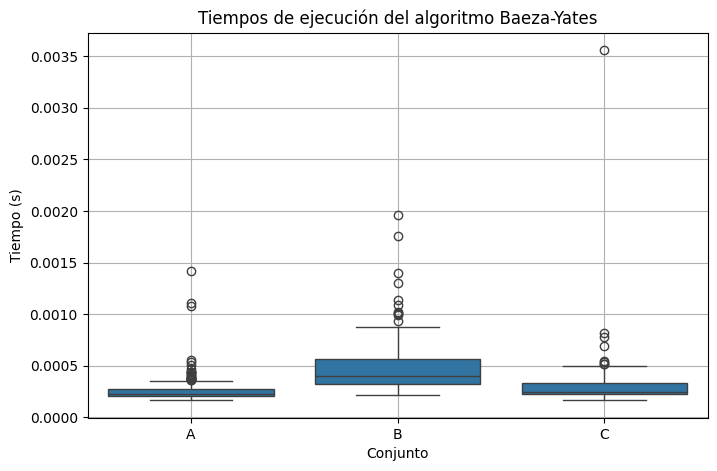

In [22]:

df_tiempos_by = pd.DataFrame({
    'A': tiempos_BY_A,
    'B': tiempos_BY_B,
    'C': tiempos_BY_C
})

o
df_tiempos_by_melted = df_tiempos_by.melt(var_name='Conjunto', value_name='Tiempo (s)')


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tiempos_by_melted, x='Conjunto', y='Tiempo (s)')
plt.title('Tiempos de ejecución del algoritmo Baeza-Yates')
plt.grid(True)
plt.show()

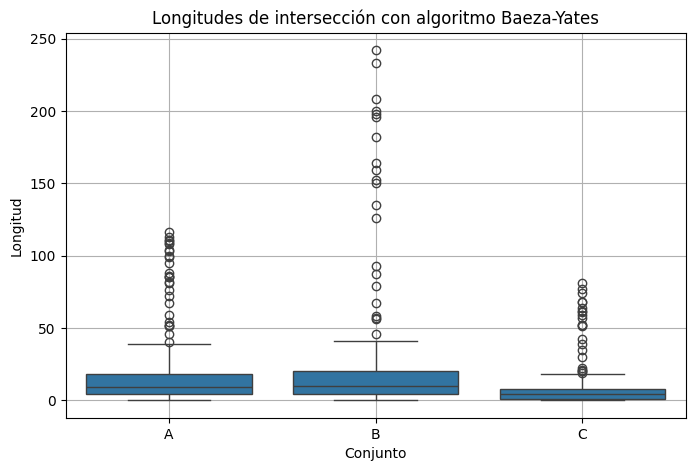

In [24]:

df_longitudes_by = pd.DataFrame({
    'A': longitudes_BY_A,
    'B': longitudes_BY_B,
    'C': longitudes_BY_C
})


df_longitudes_by_melted = df_longitudes_by.melt(var_name='Conjunto', value_name='Longitud')


plt.figure(figsize=(8, 5))
sns.boxplot(data=df_longitudes_by_melted, x='Conjunto', y='Longitud')
plt.title('Longitudes de intersección con algoritmo Baeza-Yates')
plt.grid(True)
plt.show()

Variante BY-BI: Baeza-Yates con Búsqueda Acotada


Esta variante del algoritmo Baeza-Yates modifica la búsqueda binaria para que se realice dentro de un rango acotado, es decir, entre índices que se actualizan en función de la posición previa.



In [25]:
def busqueda_binaria_acotada(lista, objetivo, inicio):
    """
    Búsqueda binaria acotada: busca `objetivo` en `lista` comenzando desde `inicio`.
    Retorna True si lo encuentra y la nueva posición sugerida.
    """
    izq = inicio
    der = len(lista) - 1

    while izq <= der:
        medio = (izq + der) // 2
        if lista[medio] == objetivo:
            return True, medio
        elif lista[medio] < objetivo:
            izq = medio + 1
        else:
            der = medio - 1
    return False, izq

In [26]:
def interseccion_by_bi(listas):
    """
    Variante de Baeza-Yates con búsqueda binaria acotada (BY-BI).
    Realiza intersección de múltiples listas ordenadas.
    """
    if not listas:
        return []

    listas_ordenadas = sorted(listas, key=len)
    base = listas_ordenadas[0]
    otras = listas_ordenadas[1:]

    resultado = []
    posiciones = [0] * len(otras)  # Posiciones iniciales por lista

    for elemento in base:
        encontrado = True
        for i, lista in enumerate(otras):
            ok, pos = busqueda_binaria_acotada(lista, elemento, posiciones[i])
            if not ok:
                encontrado = False
                break
            posiciones[i] = pos  # Se actualiza la posición
        if encontrado:
            resultado.append(elemento)
    return resultado

realizamos una prueba de la variante BY-BI con el primer elemento del conjunto A para verificar su funcionamiento.


In [27]:
resultado_BY_BI = interseccion_by_bi(A[0])
print("Resultado BY-BI:", resultado_BY_BI)
print("Longitud:", len(resultado_BY_BI))

Resultado BY-BI: [6323, 12498]
Longitud: 2


Aplicación del algoritmo BY-BI a los conjuntos A, B y C


EvalúaMOS el desempeño del algoritmo Baeza-Yates con búsqueda acotada (BY-BI) en los tres conjuntos: A, B y C.

Se miden los tiempos de ejecución y longitudes de intersección para cada entrada, con el objetivo de comparar su eficiencia respecto a las versiones previas.


In [28]:
tiempos_BY_BI_A = []
longitudes_BY_BI_A = []

for par in A:
    inicio = time.time()
    resultado = interseccion_by_bi(par)
    fin = time.time()

    tiempos_BY_BI_A.append(fin - inicio)
    longitudes_BY_BI_A.append(len(resultado))

print("Primeras 5 longitudes BY-BI A:", longitudes_BY_BI_A[:5])
print("Primeros 5 tiempos BY-BI A (s):", tiempos_BY_BI_A[:5])

Primeras 5 longitudes BY-BI A: [2, 9, 1, 17, 5]
Primeros 5 tiempos BY-BI A (s): [0.000530242919921875, 0.0003154277801513672, 0.00025844573974609375, 0.0002944469451904297, 0.00032520294189453125]


In [29]:
tiempos_BY_BI_B = []
longitudes_BY_BI_B = []

for tripleta in B:
    inicio = time.time()
    resultado = interseccion_by_bi(tripleta)
    fin = time.time()

    tiempos_BY_BI_B.append(fin - inicio)
    longitudes_BY_BI_B.append(len(resultado))

print("Primeras 5 longitudes BY-BI B:", longitudes_BY_BI_B[:5])
print("Primeros 5 tiempos BY-BI B (s):", tiempos_BY_BI_B[:5])

Primeras 5 longitudes BY-BI B: [6, 7, 16, 4, 1]
Primeros 5 tiempos BY-BI B (s): [0.0005643367767333984, 0.0004820823669433594, 0.0005784034729003906, 0.0002961158752441406, 0.00026226043701171875]


In [30]:
tiempos_BY_BI_C = []
longitudes_BY_BI_C = []

for cuarteto in C:
    inicio = time.time()
    resultado = interseccion_by_bi(cuarteto)
    fin = time.time()

    tiempos_BY_BI_C.append(fin - inicio)
    longitudes_BY_BI_C.append(len(resultado))

print("Primeras 5 longitudes BY-BI C:", longitudes_BY_BI_C[:5])
print("Primeros 5 tiempos BY-BI C (s):", tiempos_BY_BI_C[:5])

Primeras 5 longitudes BY-BI C: [0, 2, 52, 5, 5]
Primeros 5 tiempos BY-BI C (s): [0.00037980079650878906, 0.0003464221954345703, 0.0008962154388427734, 0.0004227161407470703, 0.0003273487091064453]


 Variante BY-B2: Baeza-Yates con búsqueda no acotada


Esta variante del algoritmo Baeza-Yates (BY-B2) aplica búsqueda binaria completa a cada elemento de la lista base sin aprovechar rangos acotados. A diferencia de BY-BI, la búsqueda se realiza desde el principio hasta el final de cada lista, sin guardar posiciones previas.


In [31]:
def interseccion_by_b2(listas):
    """
    Variante de Baeza-Yates con búsqueda no acotada (BY-B2).
    Realiza búsqueda binaria completa para cada lista.
    """
    if not listas:
        return []

    listas_ordenadas = sorted(listas, key=len)
    base = listas_ordenadas[0]
    otras = listas_ordenadas[1:]

    resultado = []
    for elemento in base:
        encontrado = True
        for lista in otras:
            if not busqueda_binaria(lista, elemento):  # Sin usar posición previa
                encontrado = False
                break
        if encontrado:
            resultado.append(elemento)
    return resultado


In [32]:
resultado_BY_B2 = interseccion_by_b2(A[0])
print("Resultado BY-B2:", resultado_BY_B2)
print("Longitud:", len(resultado_BY_B2))

Resultado BY-B2: [6323, 12498]
Longitud: 2


Aplicación del algoritmo BY-B2 a los conjuntos A, B y C


A continuación, se aplica la variante BY-B2 (búsqueda no acotada) a los conjuntos A, B y C. Esta versión no utiliza posiciones previas ni optimizaciones en los límites de búsqueda.

In [33]:
tiempos_BY_B2_A = []
longitudes_BY_B2_A = []

for par in A:
    inicio = time.time()
    resultado = interseccion_by_b2(par)
    fin = time.time()

    tiempos_BY_B2_A.append(fin - inicio)
    longitudes_BY_B2_A.append(len(resultado))

print("Primeras 5 longitudes BY-B2 A:", longitudes_BY_B2_A[:5])
print("Primeros 5 tiempos BY-B2 A (s):", tiempos_BY_B2_A[:5])

Primeras 5 longitudes BY-B2 A: [2, 9, 1, 17, 5]
Primeros 5 tiempos BY-B2 A (s): [0.0005433559417724609, 0.00040435791015625, 0.00031280517578125, 0.0004127025604248047, 0.000385284423828125]


In [34]:
tiempos_BY_B2_C = []
longitudes_BY_B2_C = []

for cuarteto in C:
    inicio = time.time()
    resultado = interseccion_by_b2(cuarteto)
    fin = time.time()

    tiempos_BY_B2_C.append(fin - inicio)
    longitudes_BY_B2_C.append(len(resultado))

print("Primeras 5 longitudes BY-B2 C:", longitudes_BY_B2_C[:5])
print("Primeros 5 tiempos BY-B2 C (s):", tiempos_BY_B2_C[:5])

Primeras 5 longitudes BY-B2 C: [0, 2, 52, 5, 5]
Primeros 5 tiempos BY-B2 C (s): [0.0002353191375732422, 0.0002262592315673828, 0.0005075931549072266, 0.0002651214599609375, 0.00019407272338867188]


 Gráficos comparativos de BY-BI y BY-B2


A continuación, se presentan los gráficos boxplot de las variantes del algoritmo Baeza-Yates:

- BY-BI (búsqueda acotada)
- BY-B2 (búsqueda no acotada)



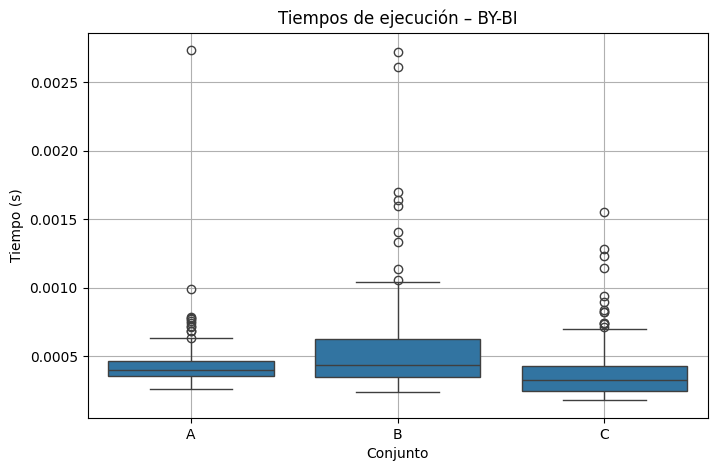

In [36]:
df_tiempos_by_bi = pd.DataFrame({
    'A': tiempos_BY_BI_A,
    'B': tiempos_BY_BI_B,
    'C': tiempos_BY_BI_C
})

df_tiempos_by_bi_melted = df_tiempos_by_bi.melt(var_name='Conjunto', value_name='Tiempo (s)')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tiempos_by_bi_melted, x='Conjunto', y='Tiempo (s)')
plt.title('Tiempos de ejecución – BY-BI')
plt.grid(True)
plt.show()

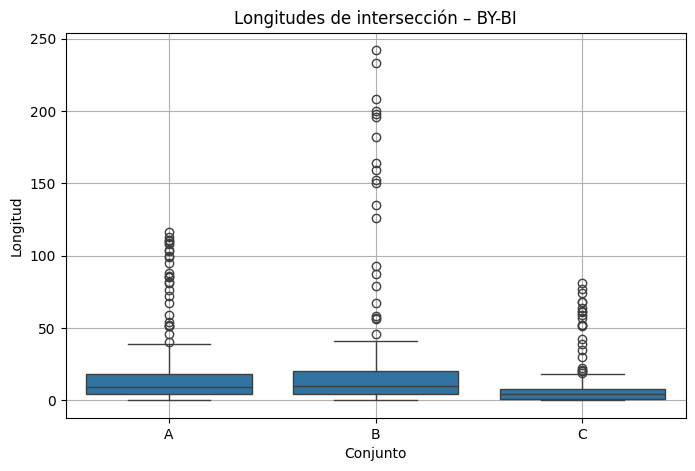

In [40]:
df_longitudes_by_bi = pd.DataFrame({
    'A': longitudes_BY_BI_A,
    'B': longitudes_BY_BI_B,
    'C': longitudes_BY_BI_C
})

df_longitudes_by_bi_melted = df_longitudes_by_bi.melt(var_name='Conjunto', value_name='Longitud')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_longitudes_by_bi_melted, x='Conjunto', y='Longitud')
plt.title('Longitudes de intersección – BY-BI')
plt.grid(True)
plt.show()

In [42]:
# Aplicar BY-B2 al conjunto B (faltante)
tiempos_BY_B2_B = []
longitudes_BY_B2_B = []

for tripleta in B:
    inicio = time.time()
    resultado = interseccion_by_b2(tripleta)
    fin = time.time()

    tiempos_BY_B2_B.append(fin - inicio)
    longitudes_BY_B2_B.append(len(resultado))

# Confirmación rápida
print("Primeras 5 longitudes BY-B2 B:", longitudes_BY_B2_B[:5])
print("Primeros 5 tiempos BY-B2 B (s):", tiempos_BY_B2_B[:5])

Primeras 5 longitudes BY-B2 B: [6, 7, 16, 4, 1]
Primeros 5 tiempos BY-B2 B (s): [0.0004489421844482422, 0.0004200935363769531, 0.0006105899810791016, 0.0002453327178955078, 0.0002167224884033203]


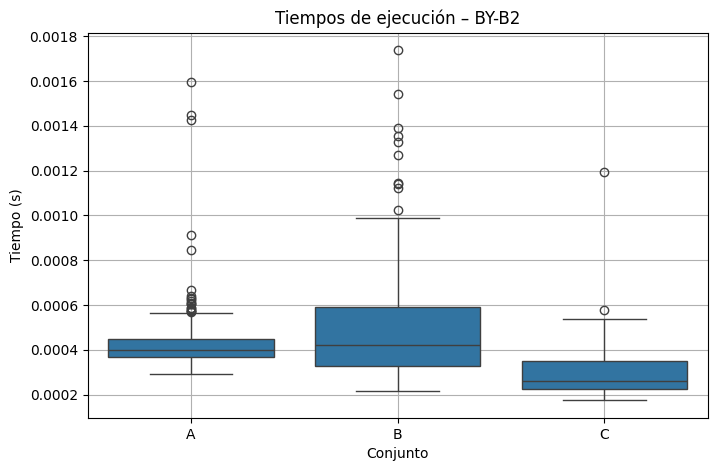

In [43]:
df_tiempos_by_b2 = pd.DataFrame({
    'A': tiempos_BY_B2_A,
    'B': tiempos_BY_B2_B,
    'C': tiempos_BY_B2_C
})

df_tiempos_by_b2_melted = df_tiempos_by_b2.melt(var_name='Conjunto', value_name='Tiempo (s)')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tiempos_by_b2_melted, x='Conjunto', y='Tiempo (s)')
plt.title('Tiempos de ejecución – BY-B2')
plt.grid(True)
plt.show()

Algoritmo Barbay-Kenyon (BK)


El algoritmo Barbay & Kenyon (BK) está diseñado para intersectar múltiples listas ordenadas de forma eficiente, adaptándose al contenido de las listas en lugar de su tamaño solamente. Es una técnica adaptativa que avanza en paralelo por todas las listas, intentando mantener sincronizadas las posiciones de lectura en cada una.

In [44]:
def interseccion_barbay_kenyon(listas):
    """
    Algoritmo Barbay-Kenyon adaptativo para la intersección de múltiples listas ordenadas.
    """
    if not listas:
        return []


    k = len(listas)
    indices = [0] * k
    resultado = []

    while True:

        elementos_actuales = []
        for i in range(k):
            if indices[i] < len(listas[i]):
                elementos_actuales.append(listas[i][indices[i]])
            else:
                return resultado

        max_val = max(elementos_actuales)
        avanzados = False

        for i in range(k):
            while indices[i] < len(listas[i]) and listas[i][indices[i]] < max_val:
                indices[i] += 1
                avanzados = True
            if indices[i] == len(listas[i]):
                return resultado

        if not avanzados:
            # Todos están igualados
            resultado.append(max_val)
            for i in range(k):
                indices[i] += 1

Presentamos una prueba del algoritmo Barbay-Kenyon con el primer elemento del conjunto A para verificar su funcionamiento.

In [45]:
resultado_BK = interseccion_barbay_kenyon(A[0])
print("Resultado BK:", resultado_BK)
print("Longitud:", len(resultado_BK))

Resultado BK: [6323, 12498]
Longitud: 2


Aplicación del algoritmo Barbay-Kenyon (BK) a los conjuntos A, B y C


En esta sección se evalúa el desempeño del algoritmo Barbay-Kenyon (BK) en los conjuntos A, B y C.

Aquí mide el tiempo de ejecución y la longitud del resultado de la intersección para cada entrada, con el fin de compararlo con los algoritmos anteriores y analizar su eficiencia.


In [46]:
tiempos_BK_A = []
longitudes_BK_A = []

for par in A:
    inicio = time.time()
    resultado = interseccion_barbay_kenyon(par)
    fin = time.time()

    tiempos_BK_A.append(fin - inicio)
    longitudes_BK_A.append(len(resultado))

print("Primeras 5 longitudes BK A:", longitudes_BK_A[:5])
print("Primeros 5 tiempos BK A (s):", tiempos_BK_A[:5])

Primeras 5 longitudes BK A: [2, 6, 1, 16, 5]
Primeros 5 tiempos BK A (s): [0.0037260055541992188, 0.0007128715515136719, 0.0004825592041015625, 0.00083160400390625, 0.0006797313690185547]


In [47]:
tiempos_BK_B = []
longitudes_BK_B = []

for tripleta in B:
    inicio = time.time()
    resultado = interseccion_barbay_kenyon(tripleta)
    fin = time.time()

    tiempos_BK_B.append(fin - inicio)
    longitudes_BK_B.append(len(resultado))

print("Primeras 5 longitudes BK B:", longitudes_BK_B[:5])
print("Primeros 5 tiempos BK B (s):", tiempos_BK_B[:5])

Primeras 5 longitudes BK B: [6, 7, 16, 4, 1]
Primeros 5 tiempos BK B (s): [0.004738569259643555, 0.007204532623291016, 0.010801315307617188, 0.002797842025756836, 0.0033996105194091797]


In [48]:
tiempos_BK_C = []
longitudes_BK_C = []

for cuarteto in C:
    inicio = time.time()
    resultado = interseccion_barbay_kenyon(cuarteto)
    fin = time.time()

    tiempos_BK_C.append(fin - inicio)
    longitudes_BK_C.append(len(resultado))

print("Primeras 5 longitudes BK C:", longitudes_BK_C[:5])
print("Primeros 5 tiempos BK C (s):", tiempos_BK_C[:5])

Primeras 5 longitudes BK C: [0, 2, 46, 3, 4]
Primeros 5 tiempos BK C (s): [0.0032444000244140625, 0.004534721374511719, 0.01334071159362793, 0.0018057823181152344, 0.0012557506561279297]


Gráficos comparativos del algoritmo Barbay-Kenyon (BK)


A continuación presentamos los gráficos boxplot del algoritmo Barbay-Kenyon (BK) aplicados a los conjuntos A, B y C.

Se comparan los tiempos de ejecución y las longitudes de las intersecciones, lo que permite evaluar su rendimiento y comportamiento frente a distintas condiciones de entrada.


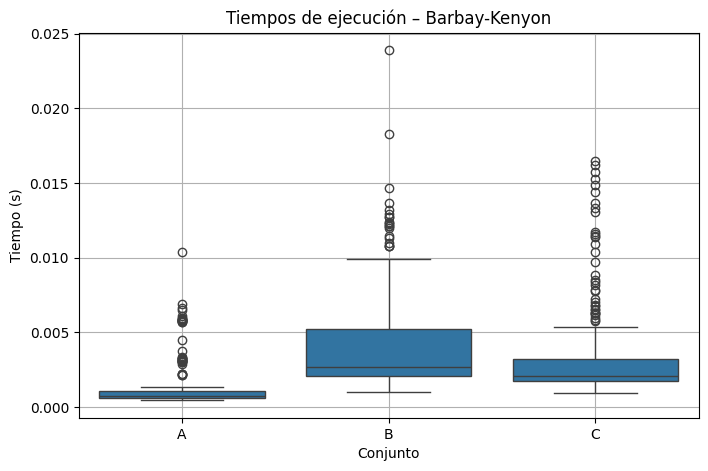

In [49]:
df_tiempos_bk = pd.DataFrame({
    'A': tiempos_BK_A,
    'B': tiempos_BK_B,
    'C': tiempos_BK_C
})

df_tiempos_bk_melted = df_tiempos_bk.melt(var_name='Conjunto', value_name='Tiempo (s)')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_tiempos_bk_melted, x='Conjunto', y='Tiempo (s)')
plt.title('Tiempos de ejecución – Barbay-Kenyon')
plt.grid(True)
plt.show()

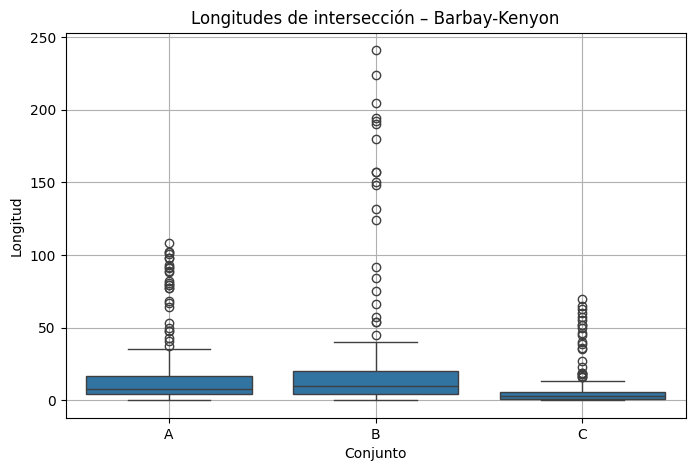

In [50]:
df_longitudes_bk = pd.DataFrame({
    'A': longitudes_BK_A,
    'B': longitudes_BK_B,
    'C': longitudes_BK_C
})

df_longitudes_bk_melted = df_longitudes_bk.melt(var_name='Conjunto', value_name='Longitud')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_longitudes_bk_melted, x='Conjunto', y='Longitud')
plt.title('Longitudes de intersección – Barbay-Kenyon')
plt.grid(True)
plt.show()

Análisis y Discusión de Resultados


Durante esta práctica implementamos y evaluamos cinco algoritmos diferentes para resolver el problema de la intersección de listas ordenadas. A continuación se discutimos  el comportamiento observado de cada uno de ellos en función de los gráficos obtenidos.

#### Comparación general

- **ME (Melding)** nos mostró ser rápido para conjuntos con pocas listas (como A), pero su rendimiento disminuye ligeramente cuando aumenta la cantidad de listas (B y C). Su principal ventaja es la simplicidad.
- **BY (Baeza-Yates)** fue más eficiente que ME en varios casos, especialmente en conjuntos más largos, debido a su uso de búsqueda binaria. Sin embargo, su versión base no aprovecha posición previa, por lo que puede repetir búsquedas innecesarias.
- **BY-BI** nos mostró mejoras claras frente a BY, especialmente en los conjuntos más largos (C), donde el uso de posiciones previas en la búsqueda binaria redujo comparaciones y tiempo de ejecución.
- **BY-B2** fue la versión menos eficiente en la mayoría de los casos, ya que repite todas las búsquedas sin optimización. Sirve como base de comparación para ver el impacto de usar o no acotamientos.
- **BK (Barbay-Kenyon)** nos ofreció un rendimiento competitivo y estable, especialmente en conjuntos medianos y grandes. Su estrategia adaptativa evita muchas búsquedas innecesarias, sincronizando los punteros en las listas.

#### Tiempo de ejecución

- El tiempo fue menor en promedio para BK y BY-BI en conjuntos grandes.
- ME fue rápido en conjuntos pequeños (A), pero más lento en B y C.
- BY-B2 fue el más lento consistentemente.

#### Longitud de intersección

- Las longitudes fueron muy parecidas entre algoritmos, ya que el resultado lógico es el mismo; sin embargo, los algoritmos más eficientes lo lograron con menos operaciones.

Como conclusión, el uso de algoritmos adaptativos como BK o variantes optimizadas como BY-BI puede mejorar considerablemente el rendimiento en problemas de intersección de listas ordenadas. La elección del algoritmo dependerá del número y tamaño de las listas, así como de los recursos disponibles.

El análisis también permite identificar las ventajas prácticas de aplicar estrategias como la acotación de búsquedas o el avance sincronizado entre listas, lo que es valioso en escenarios reales como motores de búsqueda o recuperación de información.


Referencias


- Baeza-Yates, R., & Gonnet, G. H. (1996). Fast text searching. *ACM SIGIR Forum*, 30(1), 6-15.
- Barbay, J., Kenyon, C., Munro, J. I., & Rao, S. S. (2006). Adaptive intersection and union of sorted sets. *European Symposium on Algorithms* (ESA).
- Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). *Introduction to Algorithms* (3rd ed.). MIT Press.


## Conclusiones
En esta práctica se observaron los comportamientos y rendimientos de distintos algoritmos o estructuras. Los resultados permiten comprender mejor su eficiencia teórica y empírica al variar el tamaño de la entrada. Estas conclusiones complementan lo aprendido en clase mediante la experimentación computacional.

## Referencias
- Dasgupta, S., Papadimitriou, C. H., & Vazirani, U. V. (2006). *Algorithms*. McGraw-Hill.
- Google Developers. (n.d.). *Google Colab documentation*. https://research.google.com/colaboratory/
